<h1 align="center">Machine Learning and Vision Lab</h1>
<h4 align="center">Dr. Mohammadzadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Amir Hossein Yari - 99102507</h4>
<h4 align="center">Lab 5 - Smoothing, convolution, gradient and edge detection</h4>

In [1]:
# Import required package
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

Shape of pic1: (800, 1200, 3)
Shape of pic2: (960, 1280, 3)
Shape of pic1_gray: (800, 1200)
Shape of pic2_gray: (960, 1280)


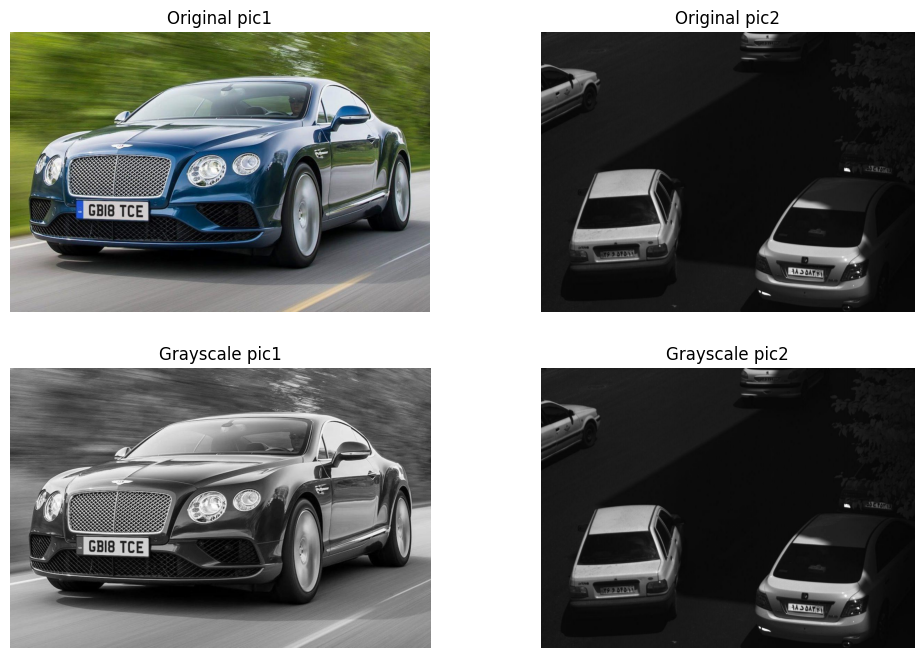

In [5]:
# Load images
pic1 = cv2.imread("1.jpg")
pic2 = cv2.imread("2.jpg")

# Print image shapes
print(f"Shape of pic1: {pic1.shape}")
print(f"Shape of pic2: {pic2.shape}")

# Convert images to grayscale
pic1_gray = cv2.cvtColor(pic1, cv2.COLOR_BGR2GRAY)
pic2_gray = cv2.cvtColor(pic2, cv2.COLOR_BGR2GRAY)

# Print grayscale image shapes
print(f"Shape of pic1_gray: {pic1_gray.shape}")
print(f"Shape of pic2_gray: {pic2_gray.shape}")

# Display images using matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(
    pic1, cv2.COLOR_BGR2RGB)), plt.title('Original pic1'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(cv2.cvtColor(
    pic2, cv2.COLOR_BGR2RGB)), plt.title('Original pic2'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(
    pic1_gray, cmap='gray'), plt.title('Grayscale pic1'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(
    pic2_gray, cmap='gray'), plt.title('Grayscale pic2'), plt.axis('off')

# Save grayscale images
gray_images_path = "grayImages"
os.makedirs(gray_images_path, exist_ok=True)
cv2.imwrite(os.path.join(gray_images_path, "pic1_gray.jpg"), pic1_gray)
cv2.imwrite(os.path.join(gray_images_path, "pic2_gray.jpg"), pic2_gray)

# Show the plots
plt.show()

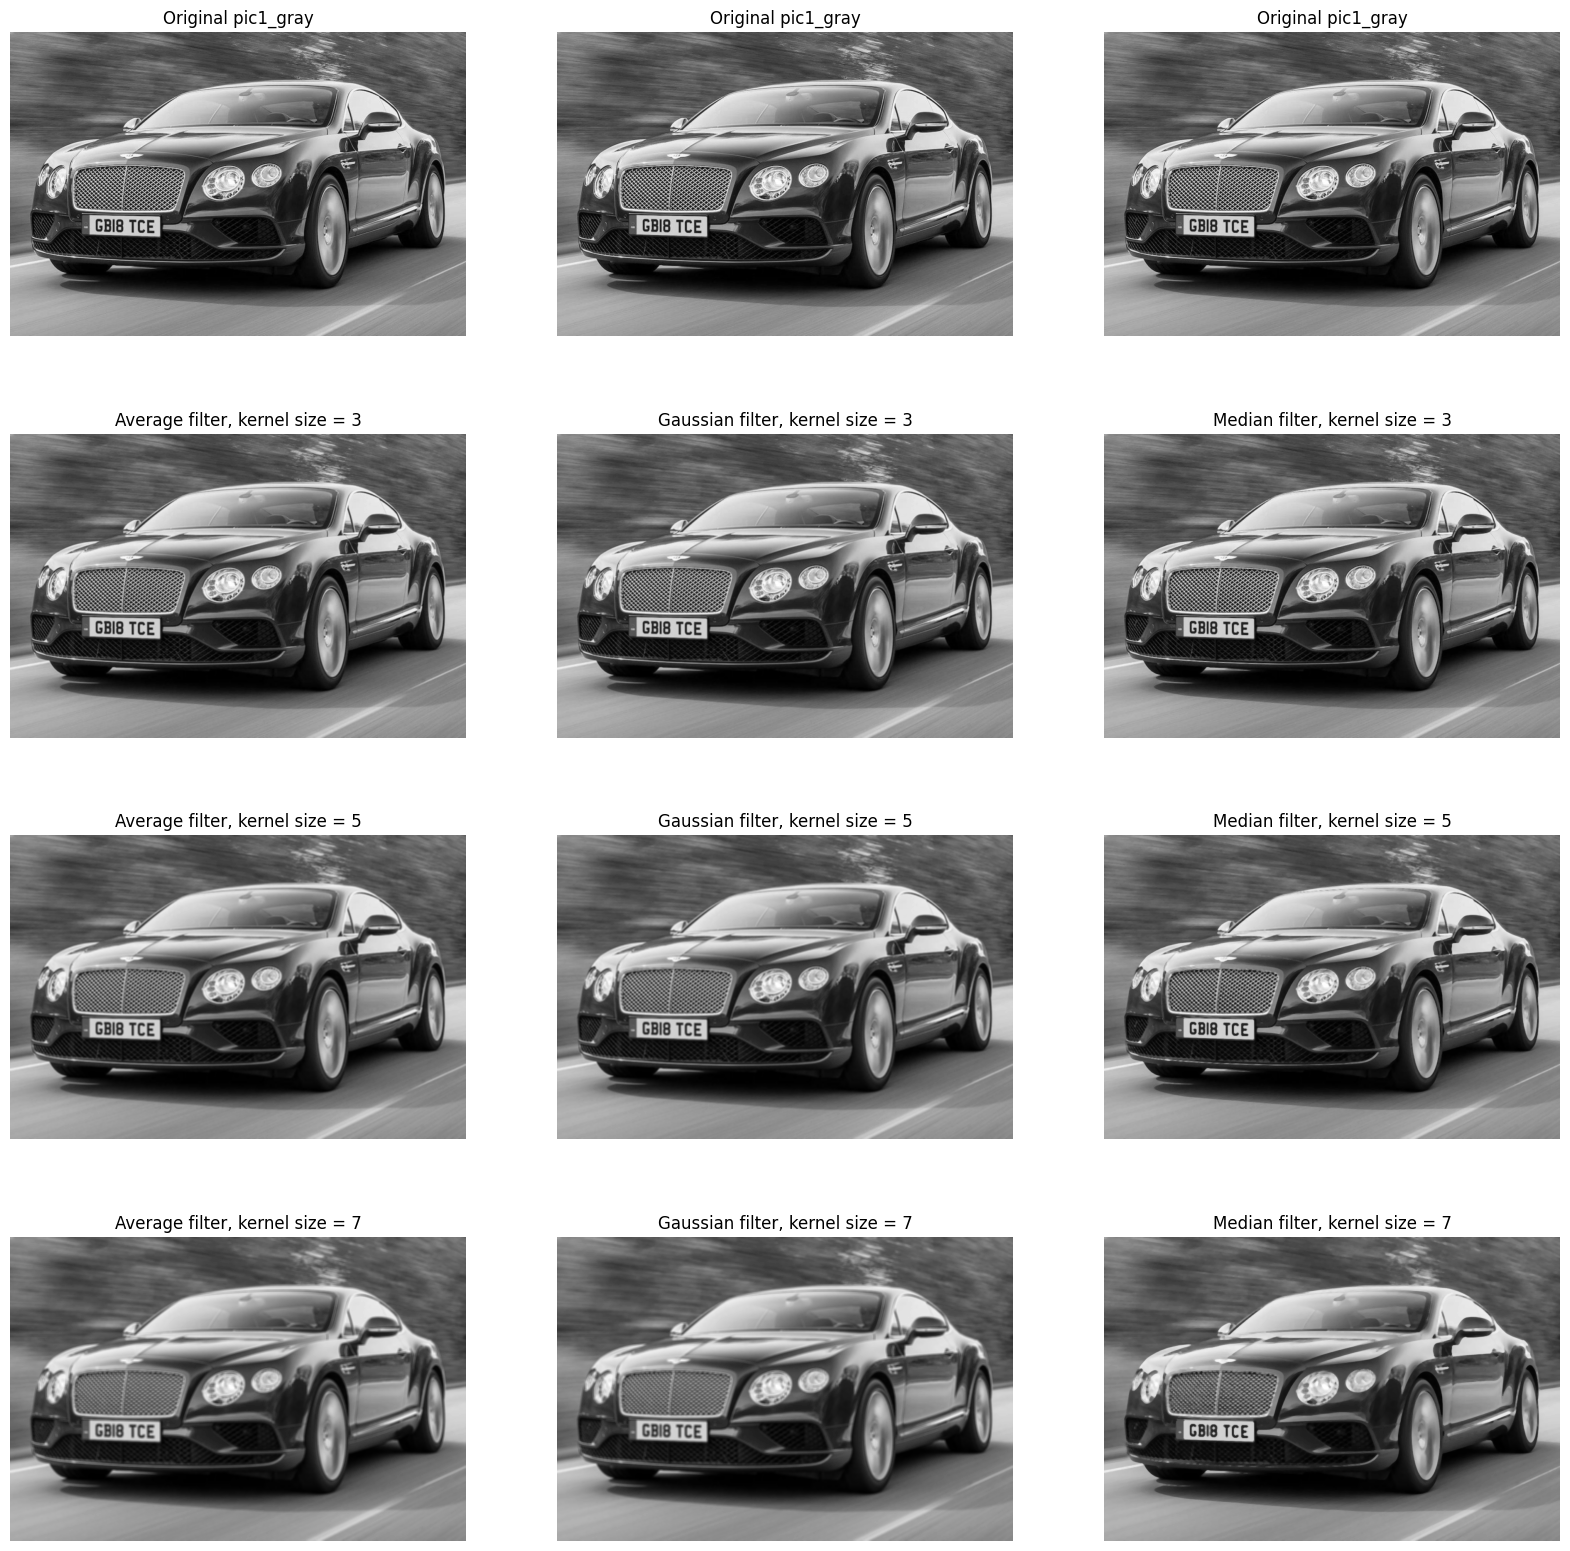

In [8]:
smooth_images_path = "Smooth_pic1"
os.makedirs(smooth_images_path, exist_ok=True)

plt.figure(figsize=(20, 20))

# Display original grayscale image
plt.subplot(4, 3, 1), plt.imshow(
    pic1_gray, cmap='gray'), plt.title('Original pic1_gray'), plt.axis('off')
plt.subplot(4, 3, 2), plt.imshow(
    pic1_gray, cmap='gray'), plt.title('Original pic1_gray'), plt.axis('off')
plt.subplot(4, 3, 3), plt.imshow(
    pic1_gray, cmap='gray'), plt.title('Original pic1_gray'), plt.axis('off')

# Display smoothed images for different kernel sizes
for idx, kernel_size in enumerate([3, 5, 7]):
    pic1_average = cv2.blur(pic1_gray, (kernel_size, kernel_size))
    pic1_gaussian = cv2.GaussianBlur(pic1_gray, (kernel_size, kernel_size), 10) # sigma = 10
    pic1_median = cv2.medianBlur(pic1_gray, kernel_size)

    plt.subplot(4, 3, (idx + 1) * 3 + 1), plt.imshow(pic1_average, cmap='gray'), plt.title(
        f'Average filter, kernel size = {kernel_size}'), plt.axis('off')
    plt.subplot(4, 3, (idx + 1) * 3 + 2), plt.imshow(pic1_gaussian, cmap='gray'), plt.title(
        f'Gaussian filter, kernel size = {kernel_size}'), plt.axis('off')
    plt.subplot(4, 3, (idx + 1) * 3 + 3), plt.imshow(pic1_median, cmap='gray'), plt.title(
        f'Median filter, kernel size = {kernel_size}'), plt.axis('off')

    # Save smoothed images
    cv2.imwrite(os.path.join(smooth_images_path, f"pic1_gray_avg_{kernel_size}.jpg"), pic1_average)
    cv2.imwrite(os.path.join(smooth_images_path, f"pic1_gray_gau_{kernel_size}.jpg"), pic1_gaussian)
    cv2.imwrite(os.path.join(smooth_images_path, f"pic1_gray_med_{kernel_size}.jpg"), pic1_median)

# Show the plots
plt.show()

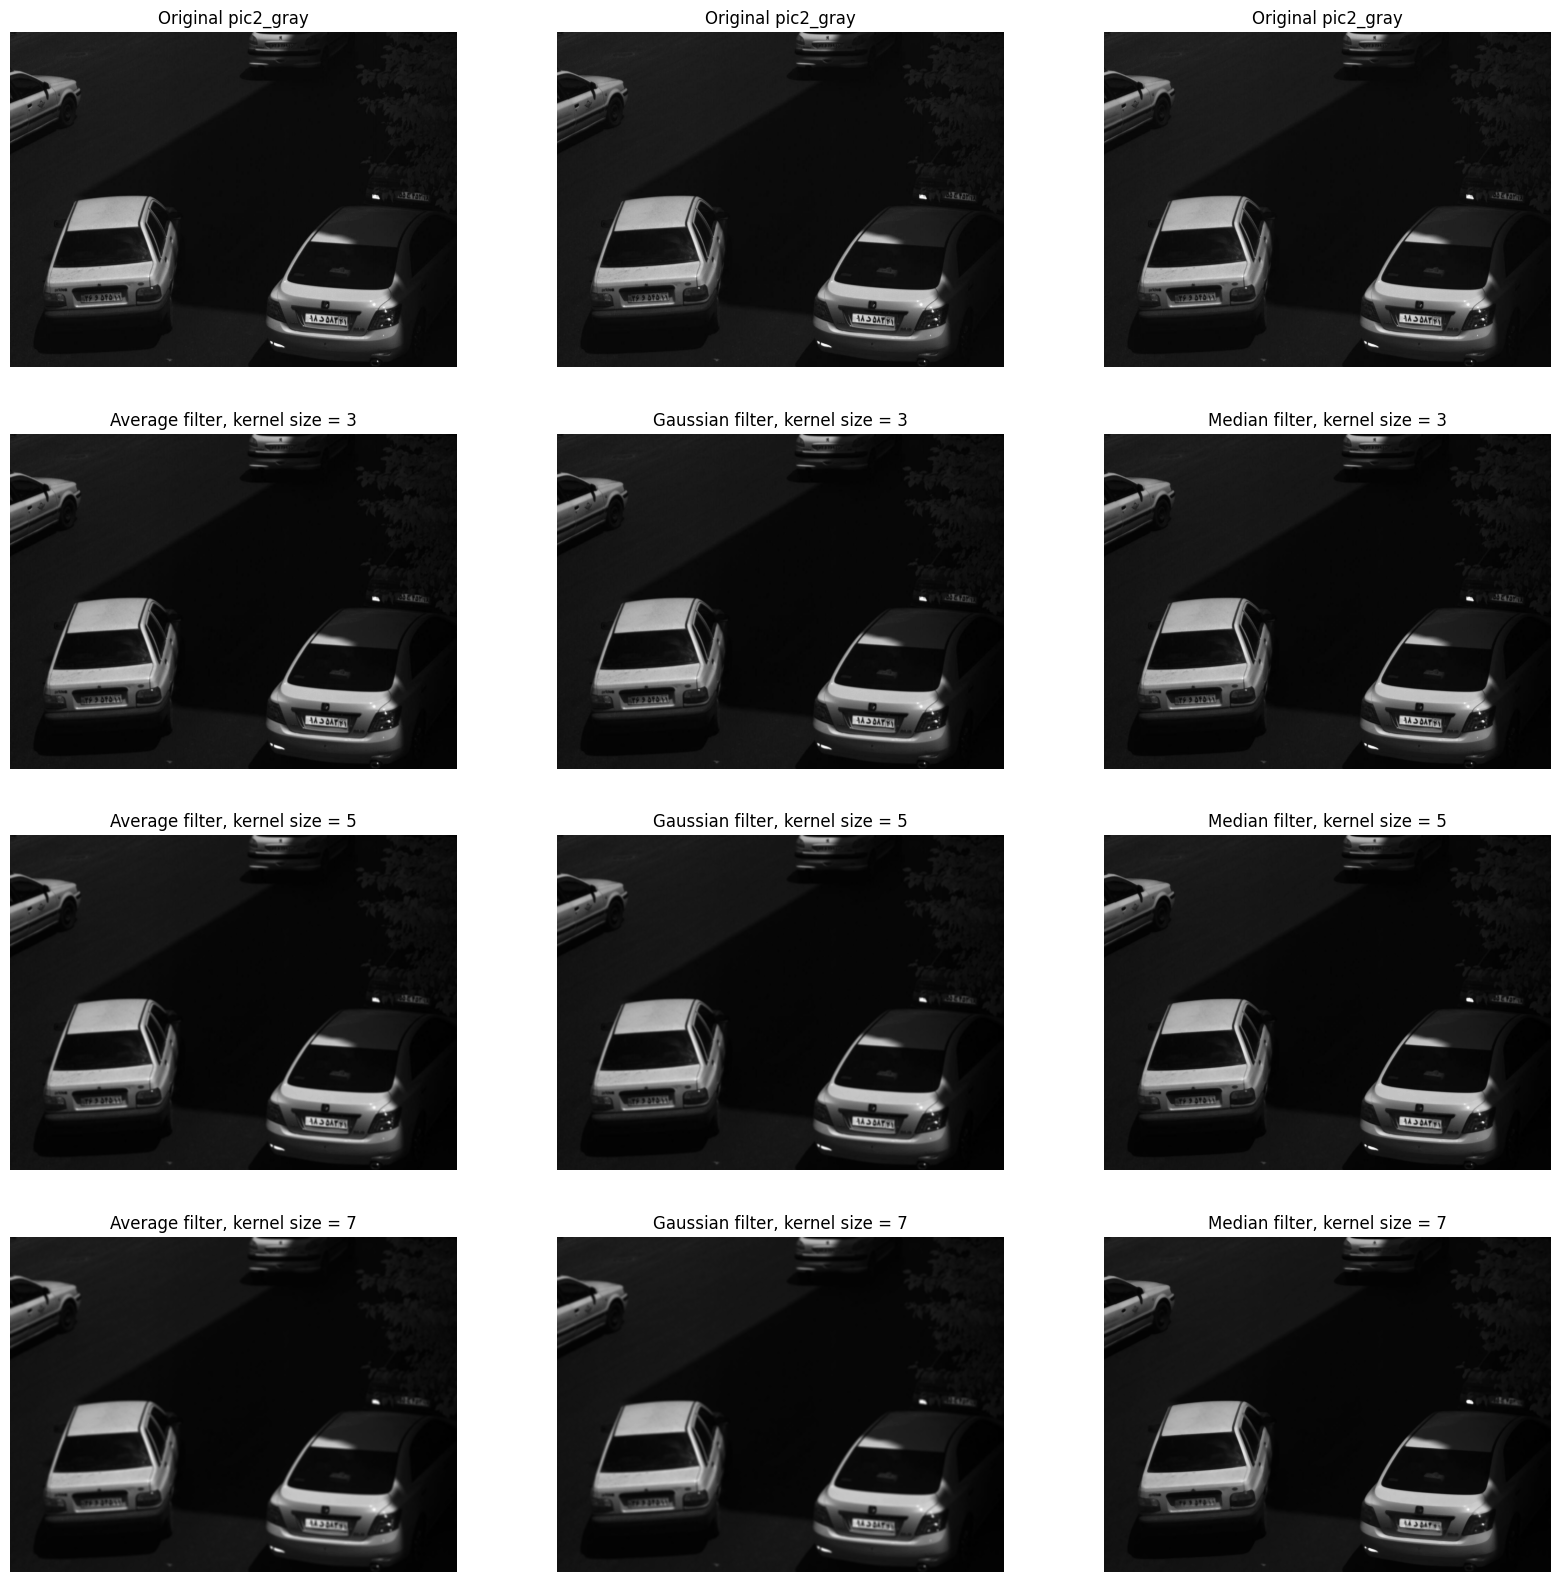

In [9]:
smooth_images_path = "Smooth_pic2"
os.makedirs(smooth_images_path, exist_ok=True)

plt.figure(figsize=(20, 20))

# Display original grayscale image
plt.subplot(4, 3, 1), plt.imshow(
    pic2_gray, cmap='gray'), plt.title('Original pic2_gray'), plt.axis('off')
plt.subplot(4, 3, 2), plt.imshow(
    pic2_gray, cmap='gray'), plt.title('Original pic2_gray'), plt.axis('off')
plt.subplot(4, 3, 3), plt.imshow(
    pic2_gray, cmap='gray'), plt.title('Original pic2_gray'), plt.axis('off')

# Display smoothed images for different kernel sizes
for idx, kernel_size in enumerate([3, 5, 7]):
    pic2_average = cv2.blur(pic2_gray, (kernel_size, kernel_size))
    pic2_gaussian = cv2.GaussianBlur(pic2_gray, (kernel_size, kernel_size), 10) # sigma = 10
    pic2_median = cv2.medianBlur(pic2_gray, kernel_size)

    plt.subplot(4, 3, (idx + 1) * 3 + 1), plt.imshow(pic2_average, cmap='gray'), plt.title(
        f'Average filter, kernel size = {kernel_size}'), plt.axis('off')
    plt.subplot(4, 3, (idx + 1) * 3 + 2), plt.imshow(pic2_gaussian, cmap='gray'), plt.title(
        f'Gaussian filter, kernel size = {kernel_size}'), plt.axis('off')
    plt.subplot(4, 3, (idx + 1) * 3 + 3), plt.imshow(pic2_median, cmap='gray'), plt.title(
        f'Median filter, kernel size = {kernel_size}'), plt.axis('off')

    # Save smoothed images
    cv2.imwrite(os.path.join(smooth_images_path, f"pic2_gray_avg_{kernel_size}.jpg"), pic2_average)
    cv2.imwrite(os.path.join(smooth_images_path, f"pic2_gray_gau_{kernel_size}.jpg"), pic2_gaussian)
    cv2.imwrite(os.path.join(smooth_images_path, f"pic2_gray_med_{kernel_size}.jpg"), pic2_median)

# Show the plots
plt.show()

<span style="color: green;">

## Image Smoothing Filters Analysis

### Average Filter
- The average filter calculates the average of pixel values in the specified kernel area.
- It is a simple smoothing filter that reduces noise but may result in some blurring of edges.

### Gaussian Filter
- The Gaussian filter applies a convolution with a Gaussian function, giving more weight to the central pixels.
- It is effective in reducing noise while preserving edges better than the average filter.

### Median Filter
- The median filter replaces each pixel value with the median value of the pixels in the specified kernel area.
- It is particularly good at removing salt-and-pepper noise without blurring edges.

#### Analysis
- For all three filters, as the kernel size increases (3, 5, 7), the smoothing effect becomes more pronounced.
- The average filter tends to produce a uniform blurring effect, which might be more evident as the kernel size increases.
- The Gaussian filter provides a smoother result compared to the average filter and is better at preserving edges.
- The median filter is effective in reducing noise, especially salt-and-pepper noise, while maintaining better edge details compared to the average filter.
</span>

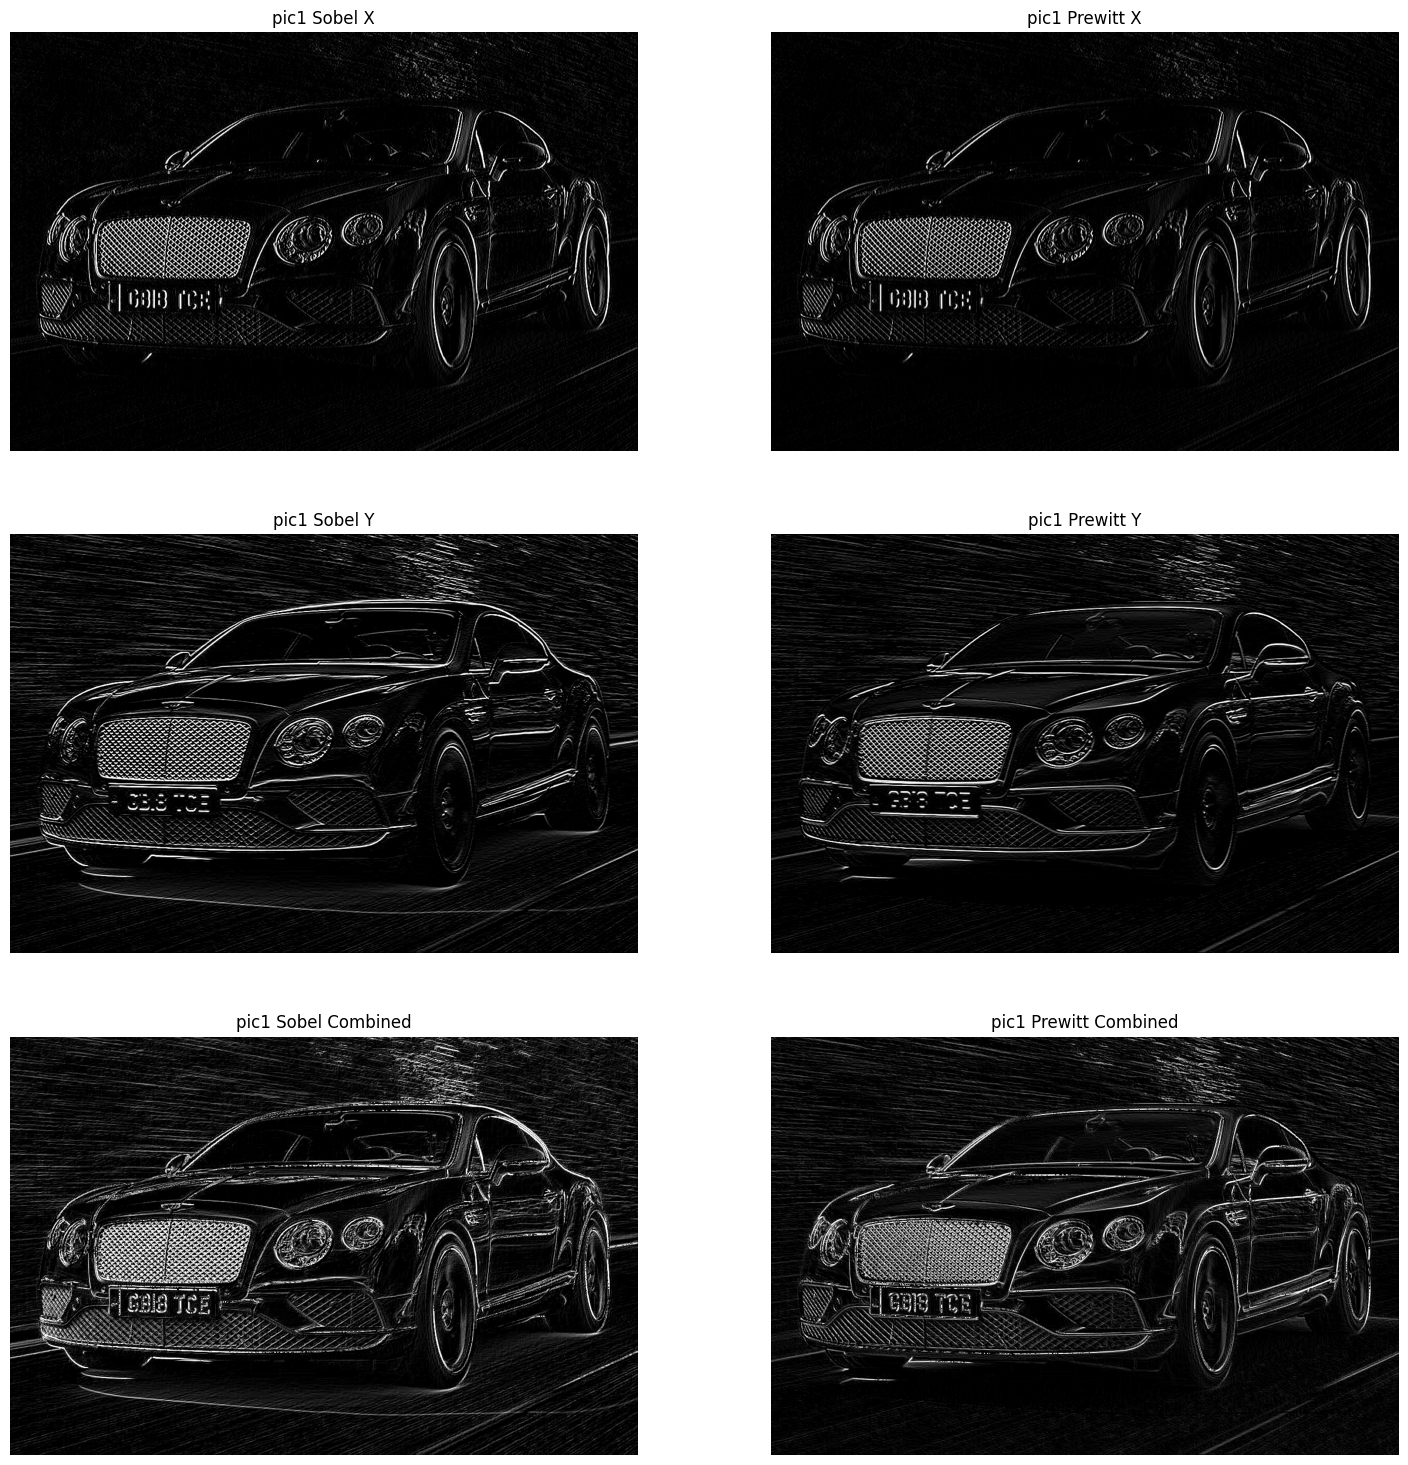

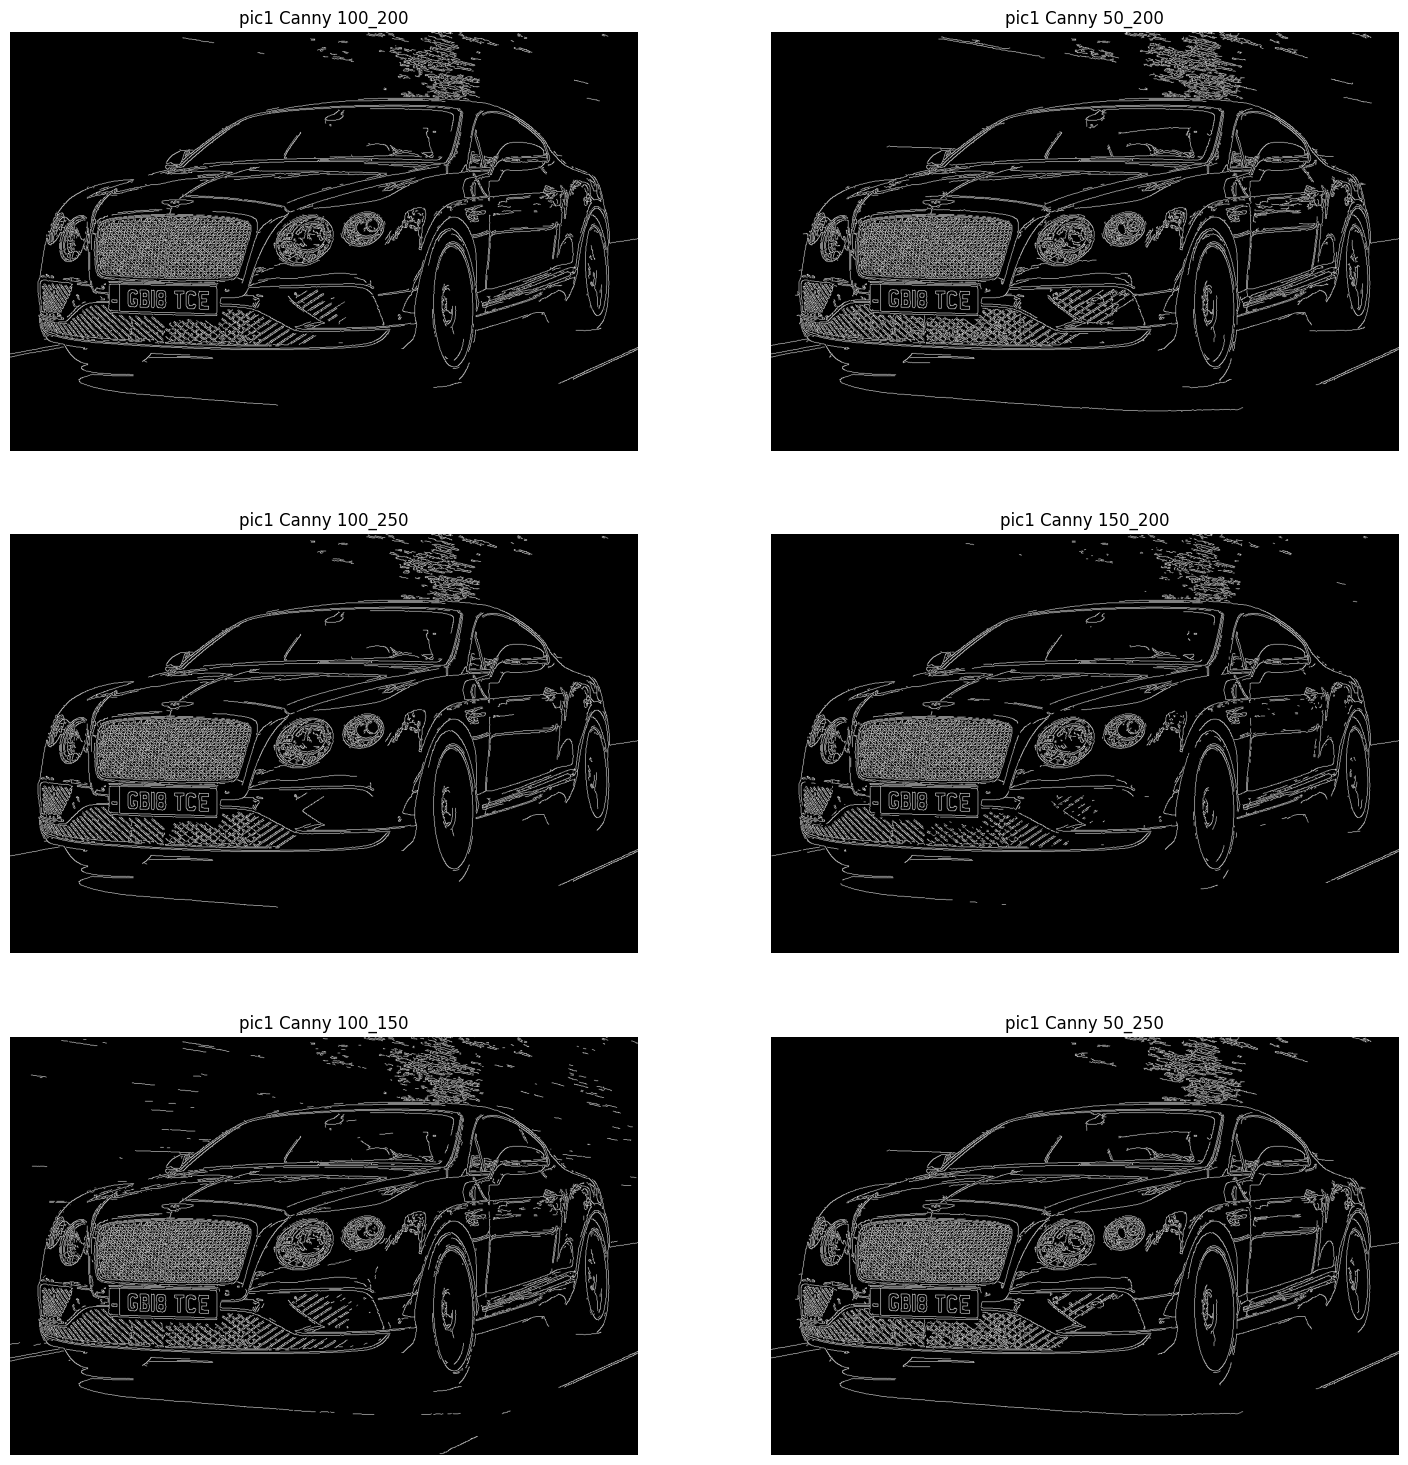

In [12]:
edge_detection_path = "edge_pic1"
os.makedirs(edge_detection_path, exist_ok=True)

# Sobel edge detection
pic1_gray_sobelX = cv2.Sobel(pic1_gray, ddepth=-1, ksize=3, dx=1, dy=0)
pic1_gray_sobelY = cv2.Sobel(pic1_gray, ddepth=-1, ksize=3, dx=0, dy=1)
pic1_gray_sobel = pic1_gray_sobelX + pic1_gray_sobelY

# Prewitt edge detection
kernely = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])
kernelx = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

pic1_gray_prewittx = cv2.filter2D(pic1_gray, -1, kernelx)
pic1_gray_prewitty = cv2.filter2D(pic1_gray, -1, kernely)
pic1_gray_prewitt = pic1_gray_prewittx + pic1_gray_prewitty

# Canny edge detection with different thresholds
canny_thresholds = [
    (100, 200), (50, 200), (100, 250),
    (150, 200), (100, 150), (50, 250)
]

plt.figure(figsize=(18, 25))

# Display Sobel and Prewitt edge detection results
for i, (filter_type, filter_result) in enumerate([
    ("Sobel X", pic1_gray_sobelX),
    ("Prewitt X", pic1_gray_prewittx),
    ("Sobel Y", pic1_gray_sobelY),
    ("Prewitt Y", pic1_gray_prewitty),
    ("Sobel Combined", pic1_gray_sobel),
    ("Prewitt Combined", pic1_gray_prewitt),
]):
    plt.subplot(4, 2, i + 1), plt.imshow(
        filter_result, cmap='gray'), plt.title(f'pic1 {filter_type}'), plt.axis('off')
    cv2.imwrite(os.path.join(edge_detection_path, f"pic1_{filter_type.replace(' ', '_').lower()}.jpg"), filter_result)

# Display Canny edge detection results with different thresholds
plt.figure(figsize=(18, 25))
for i, (low_threshold, high_threshold) in enumerate(canny_thresholds, start=1):
    canny_result = cv2.Canny(pic1_gray, low_threshold, high_threshold)
    plt.subplot(4, 2, i), plt.imshow(
        canny_result, cmap='gray'), plt.title(f'pic1 Canny {low_threshold}_{high_threshold}'), plt.axis('off')
    cv2.imwrite(os.path.join(edge_detection_path, f"pic1_canny_{low_threshold}_{high_threshold}.jpg"), canny_result)

# Show the plots
plt.show()

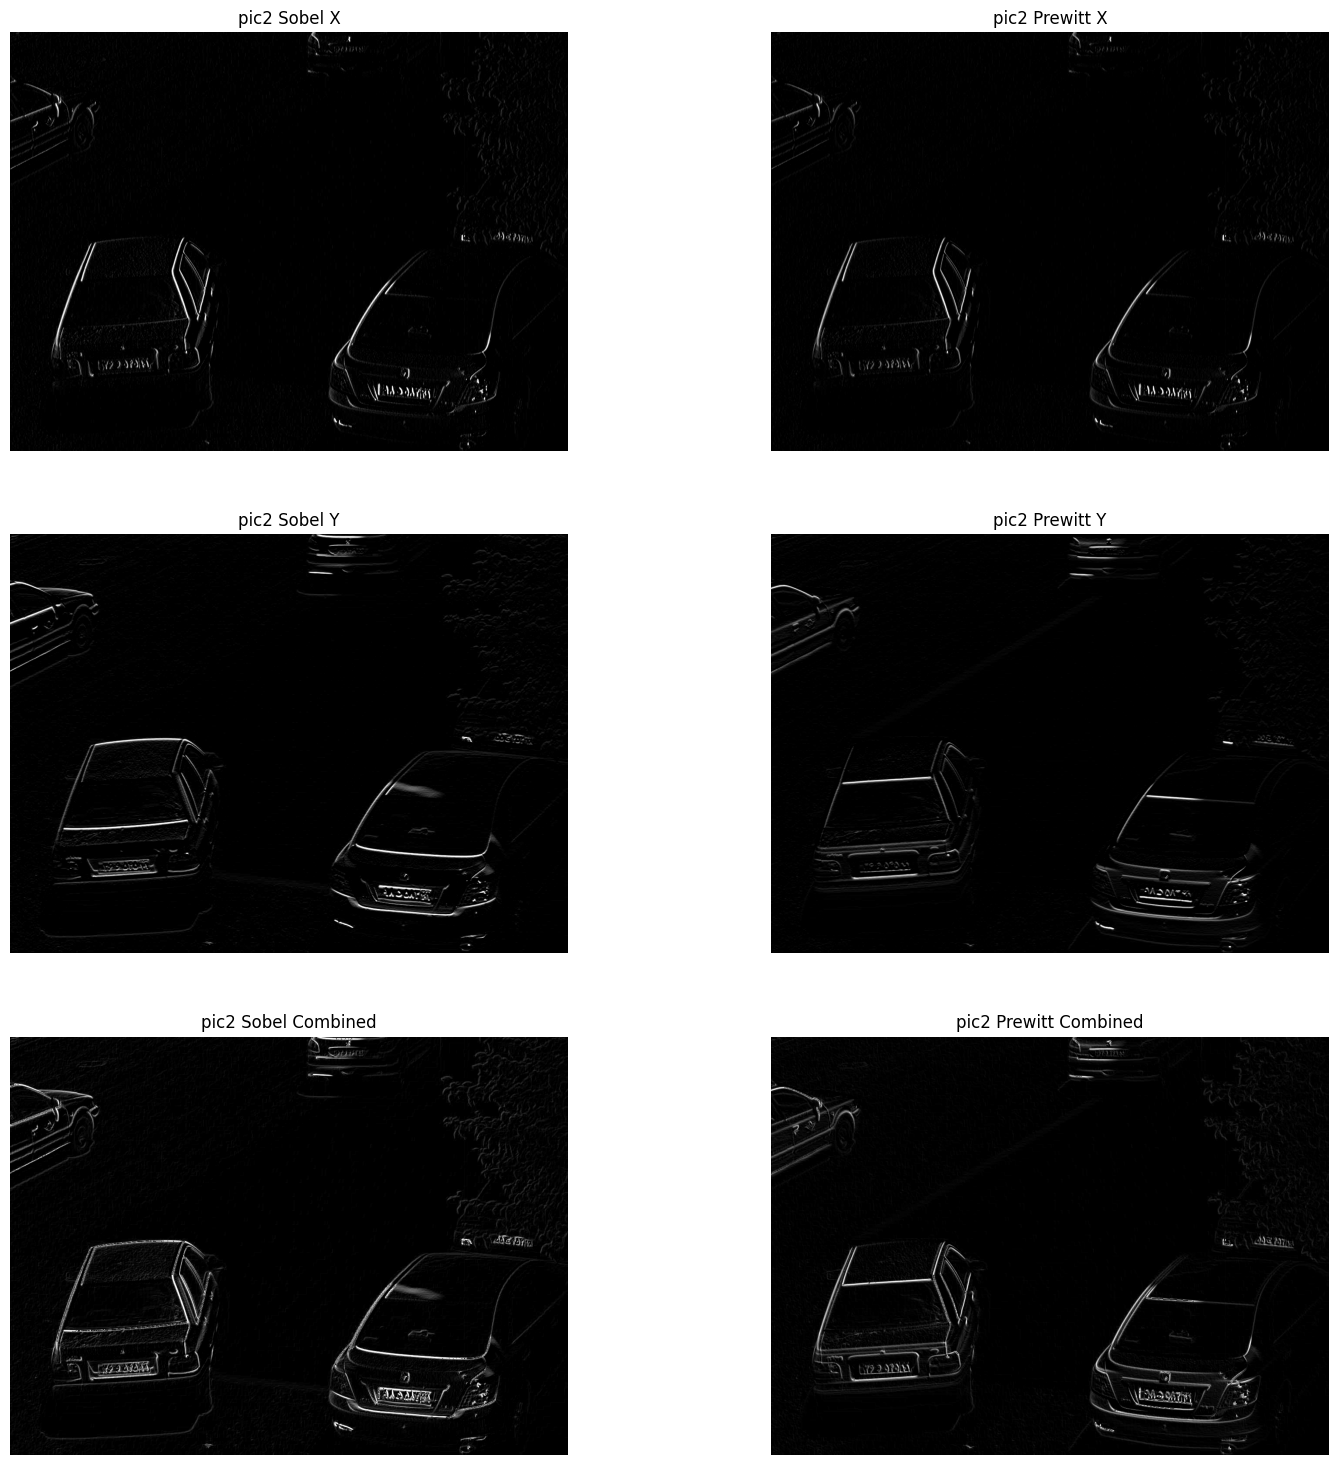

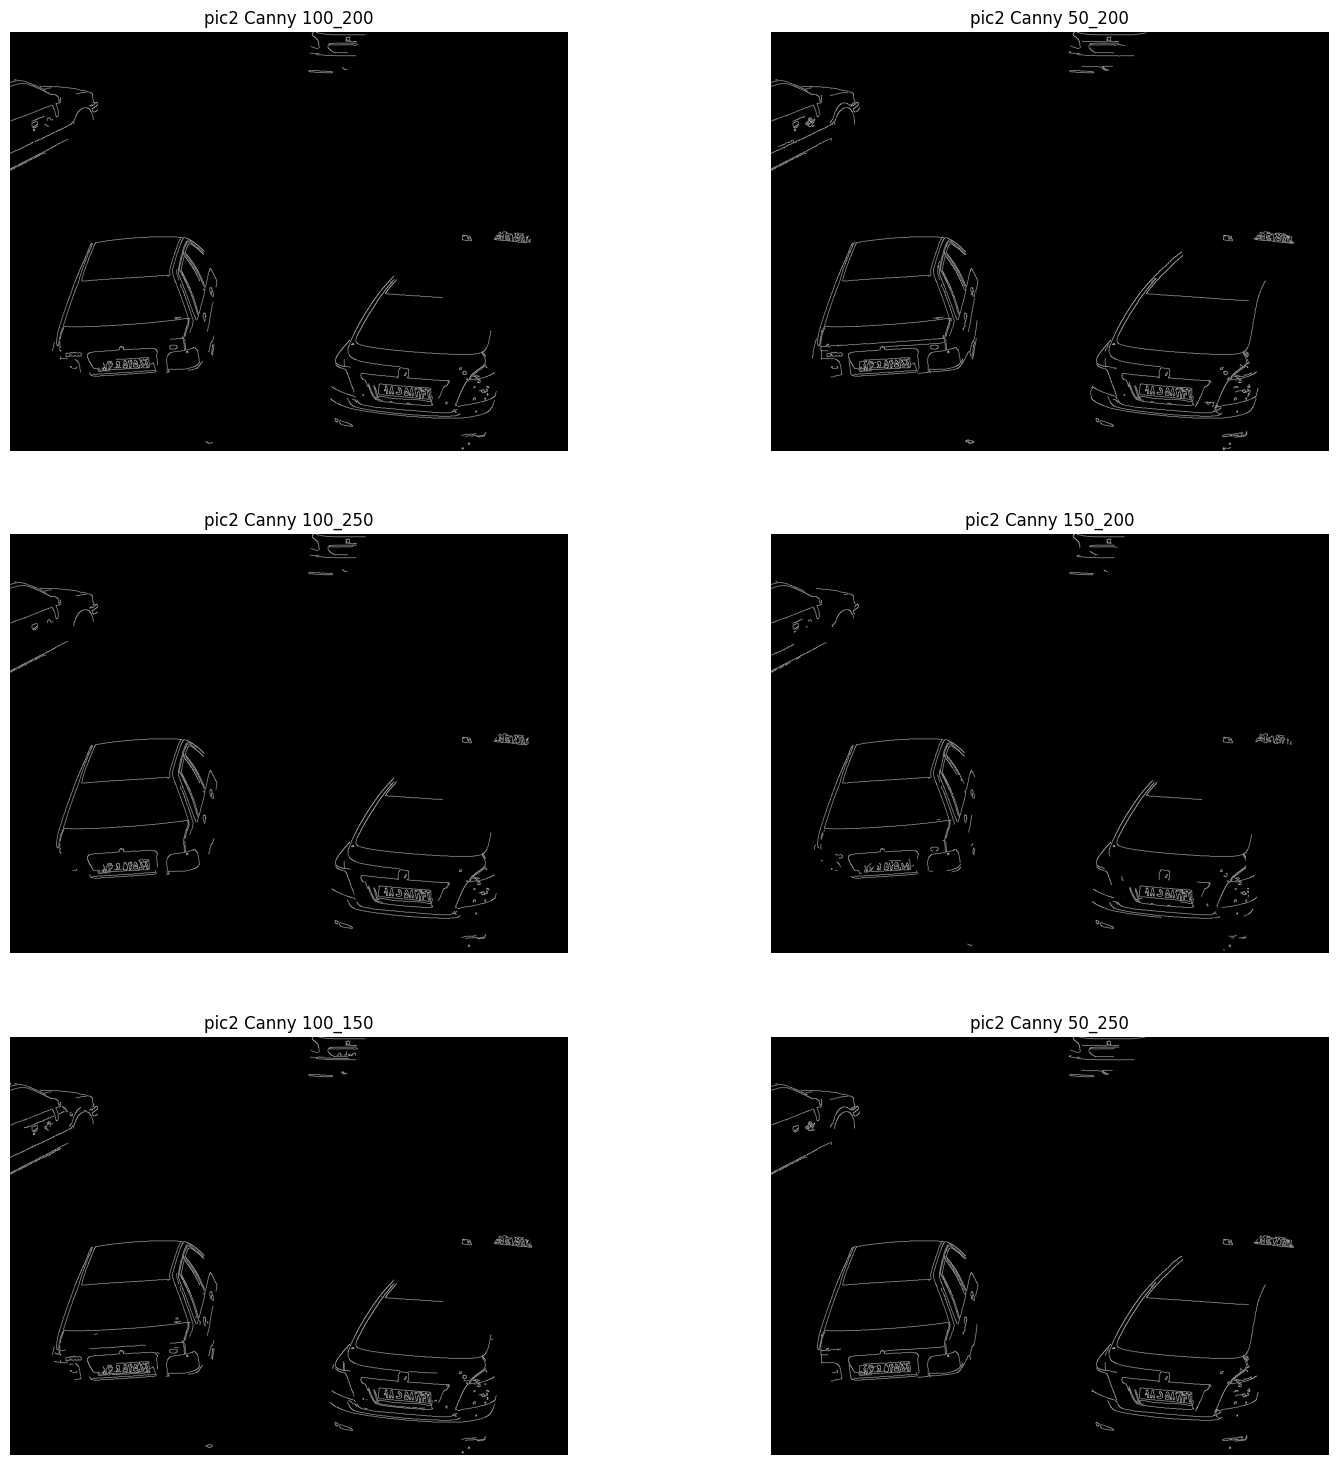

In [13]:
edge_detection_path = "edge_pic2"
os.makedirs(edge_detection_path, exist_ok=True)

# Sobel edge detection
pic2_gray_sobelX = cv2.Sobel(pic2_gray, ddepth=-1, ksize=3, dx=1, dy=0)
pic2_gray_sobelY = cv2.Sobel(pic2_gray, ddepth=-1, ksize=3, dx=0, dy=1)
pic2_gray_sobel = pic2_gray_sobelX + pic2_gray_sobelY

# Prewitt edge detection
kernely = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])
kernelx = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

pic2_gray_prewittx = cv2.filter2D(pic2_gray, -1, kernelx)
pic2_gray_prewitty = cv2.filter2D(pic2_gray, -1, kernely)
pic2_gray_prewitt = pic2_gray_prewittx + pic2_gray_prewitty

# Canny edge detection with different thresholds
canny_thresholds = [
    (100, 200), (50, 200), (100, 250),
    (150, 200), (100, 150), (50, 250)
]

plt.figure(figsize=(18, 25))

# Display Sobel and Prewitt edge detection results
for i, (filter_type, filter_result) in enumerate([
    ("Sobel X", pic2_gray_sobelX),
    ("Prewitt X", pic2_gray_prewittx),
    ("Sobel Y", pic2_gray_sobelY),
    ("Prewitt Y", pic2_gray_prewitty),
    ("Sobel Combined", pic2_gray_sobel),
    ("Prewitt Combined", pic2_gray_prewitt),
]):
    plt.subplot(4, 2, i + 1), plt.imshow(
        filter_result, cmap='gray'), plt.title(f'pic2 {filter_type}'), plt.axis('off')
    cv2.imwrite(os.path.join(edge_detection_path, f"pic2_{filter_type.replace(' ', '_').lower()}.jpg"), filter_result)

# Display Canny edge detection results with different thresholds
plt.figure(figsize=(18, 25))
for i, (low_threshold, high_threshold) in enumerate(canny_thresholds, start=1):
    canny_result = cv2.Canny(pic2_gray, low_threshold, high_threshold)
    plt.subplot(4, 2, i), plt.imshow(
        canny_result, cmap='gray'), plt.title(f'pic2 Canny {low_threshold}_{high_threshold}'), plt.axis('off')
    cv2.imwrite(os.path.join(edge_detection_path, f"pic2_canny_{low_threshold}_{high_threshold}.jpg"), canny_result)

# Show the plots
plt.show()

<span style="color: green;">

## Analysis of Edge Detection Results

### Sobel Edge Detection
- **Sobel X and Sobel Y:**
  - Sobel X highlights edges in the horizontal direction.
  - Sobel Y highlights edges in the vertical direction.

- **Sobel Combined:**
  - The combined Sobel image shows edges in both the horizontal and vertical directions.

### Prewitt Edge Detection
- **Prewitt X and Prewitt Y:**
  - Similar to Sobel, Prewitt X highlights edges in the horizontal direction, and Prewitt Y highlights edges in the vertical direction.

- **Prewitt Combined:**
  - The combined Prewitt image shows edges in both the horizontal and vertical directions.

### Canny Edge Detection
- **Canny with Different Thresholds:**
  - Canny edge detection is more complex and involves multiple stages, including gradient computation, non-maximum suppression, and edge tracking by hysteresis.
  - Results are shown for various combinations of low and high thresholds.
  - Higher thresholds result in fewer edges being detected, while lower thresholds may result in more edges.

### General Observations
- **Sobel and Prewitt:**
  - These operators highlight edges in specific directions and are sensitive to noise.
  - Combining Sobel or Prewitt in both directions provides a more comprehensive edge map.

- **Canny:**
  - Canny edge detection is generally more robust and provides cleaner edges.
  - The choice of thresholds in Canny affects the sensitivity and specificity of edge detection.

### Comparison
According to the obtained figures, it can be seen that by using the Sobel filter, even the edges related to the shadow of the object have been obtained. However, using the Prewitt filter, these details have not been captured.

As shown in the figures, the filtering results for different threshold values have been plotted. Notably, the Canny edge detection filter, unlike the Sobel and Prewitt filters, effectively removes very small edges that are in the background and are not genuine edges. The result of the Canny filter is more accurate in finding significant edges while disregarding noise.

</span>

In [3]:
def erosion(src):
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
    return cv2.erode(src, element)

def dilation(src):
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
    return cv2.dilate(src, element)

(157, 157, 3)
(157, 157, 3)


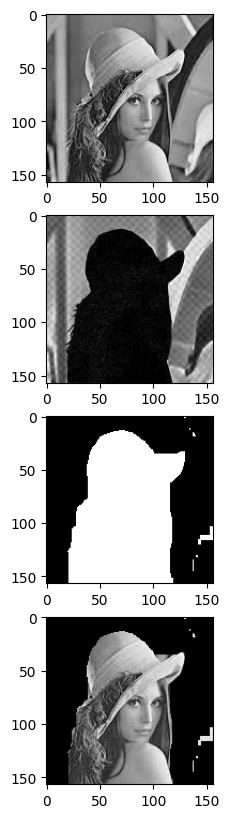

In [19]:
# Read Main Image
main = cv2.imread("main.jfif")
print(main.shape)
gray = cv2.cvtColor(main, cv2.COLOR_BGR2GRAY)

# Read Background Image
background_img = cv2.imread("background.jfif")
background_part = background_img[:, :157]
print(background_part.shape)
background = cv2.absdiff(gray, cv2.cvtColor(background_part, cv2.COLOR_BGR2GRAY))

# Create Mask
abs_diff = background
ret, thresh1 = cv2.threshold(abs_diff, 20, 255, cv2.THRESH_BINARY)
erosion_dst = erosion(thresh1)
dilation_dst = dilation(erosion_dst)

# Invert the binary mask
inverted_mask = cv2.bitwise_not(dilation_dst)

# Delete background
del_back = cv2.bitwise_and(gray, gray, mask=inverted_mask)

# Plotting
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1), plt.imshow(gray, cmap='gray')
plt.subplot(4, 1, 2), plt.imshow(background, cmap='gray')
plt.subplot(4, 1, 3), plt.imshow(inverted_mask, cmap='gray')
plt.subplot(4, 1, 4), plt.imshow(del_back, cmap='gray')

plt.show()


My webcam is not working and the TA said that I have to work with an image. I already wrote some code for the webcam part as below.

In [ ]:
video = cv2.VideoCapture('video.mp4') 
background_image = cv2.imread('background_of_video.jpg') 
while True:
    ret, frame = video.read()
    if not ret:
        break
    
    diff = cv2.absdiff(background_image, frame)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

    _, thresholded = cv2.threshold(gray, 15, 255, cv2.THRESH_BINARY)

    kernel = np.ones((5, 5), np.uint8)
    thresholded = cv2.erode(thresholded,  kernel, iterations = 2)
    thresholded = cv2.dilate(thresholded,  kernel, iterations = 2)

    result = cv2.bitwise_and(frame, frame, mask=thresholded)

    cv2.imshow('Original', frame)
    cv2.imshow('Result', result)
    
    if cv2.waitKey(30) & 0xFF == 27:
        break

video.release()
cv2.destroyAllWindows()